# Lojistik Regresyon

Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

* Bağımlı değişken kategoriktir.
* Adını bağımlı değişkene uygulanan logit dönüşümden alır.
* Doğrusal regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
* Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez.
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.

y yani bağımlı değişkenimiz kategoriktir. kategorik bir yanıt değişkeninin tahmin edilmesine sınıflandırma problemi denmiş olur.

amacımız henüz gözlenmemiş bir x değer seti geldiğinde bunun sonucunda oluşacak olan sınıfı ortaya çıkarmaktır, tahmin etmektir. bir sınıflandırıcı oluşturmaktır.

genellikle x'in her bir kategoriye ait olma olasılıklarıyla ilgilenir. sınıf tahminlerinin iyiliği yanlış sınıflandırma oranı ya da doğru sınıflandırma oranıyla ölçülür. makine öğrenmesine giriş bölümünde ele aldığımız yöntemlerle ölçülür.

* peki bu sınıflandırma işlemini neden bu lojistik regresyon ile yapıyoruz ?

yani yanıt değişkeni 1 veya 0 olduğunda burada yine bir doğrusal regresyon kuramayız mı ?

yanıt değişkeninin iki değer alabildiği durumlarda doğrusal regresyon modeli kullanılabilir fakat ikiden fazla değer alacağı durumlarda kullanılamaz ve yanıt değişkeni iki değer aldığında bir doğrusal regresyon modeli kurulabilir fakat bu durumda tahmin edilecek olan değerler 0 ve 1 değerlerinden oluşsun bu değerler bazen eksili değerler bazen 2, 3 gibi artılı değerler alabilir bu da çözülebilir. 1den yukarı olanlar 1, 0dan aşağıda olanlar 0 gibi algılanır. fakat bunun da ortaya çıkardığı bazı problemler var.

netice itibari ile lojistik regresyon modelinde kullanılan fonksiyondan dolayı tahmin edilen değerlerin 0 ile 1 arasında olması durumu garanti altına alınmaktadır. ilgilendiğimiz sınıfın 1 olması olasılığıyla ilgili bir olasılık değerleri hesaplanmış olur.

dolayısıyla doğrusal regresyonda bir modelleme çalışması için kullanılabilir fakat lojistik regresyon kullanıldığında bu yapılacak olan sınıf tahmininin 0 ile 1 arasında olmasını garanti eder ve belirlenecek olan bir eşik değerine göre bu durumun değerlendirilme şansı olur.

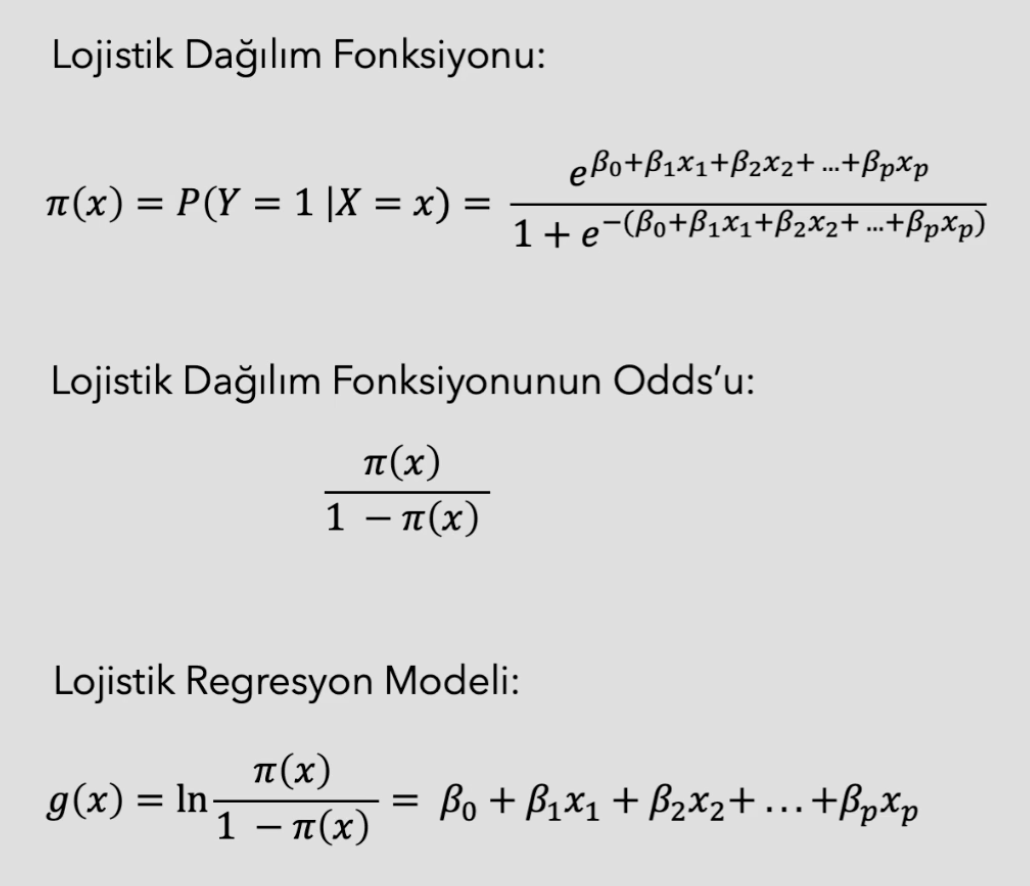

Lojistik regresyonun olayı lojistik dağılımın fonksiyonunda gizlidir. X bağımsız değişkenlerin (X) değerlerini (x) aldığımızda Y bağımlı değişkeninin 1. sınıfa ait olması olasılığı π ile hesaplanır. bu formülü odds oranına tabii tuttuğumuzda bunun logaritması alındığında lojistik regresyon modeli (g) ortaya çıkar. Doğrusal bir yapı bizi karşılar.

doğrusallığa gitme çabasının nedeni yorumlayabildiğimiz için doğrusal değerlendirmeler ve doğrusal yorumlamalar yapabiliriz

lojistik regresyon modeli sınıflandırma problemlerinin atasıdır. en başında ele alınan konulardandır. lojistik regresyon nedensellik anlamında bazı yorumlar yapabilme şansı vermektedir.

hedef/bağımlı değişken sürekli değişken olduğunda bağımlı değişkenin alacağı değer ile ilgileniyorduk.

# Lojistik Regresyon - Model

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# uyarılar gözükmesin diye
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# veri setimizi import edelim
diabetes = pd.read_csv("diabetes.csv")

In [3]:
df = diabetes.copy()

In [4]:
# eksik gözlemleri silelim
df = df.dropna()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


bir hasta geldiğinde onun şeker hastası olup olmadığını tahmin edebilecek bir makine öğrenmesi modeli geliştirilebilir mi ?

buna yönelik olarak bir veri setimiz var.
* Pregnancies: daha önce geçirilen hamilelik sayısı
* BloodPressure: kan basıncı
* BMI: vücut kitle endeksi
* Age: yaş
* Outcome: çıktı/hedef/bağımlı değişken

Outcome, 1 ise şeker hastası

öncekinde basketbol oyuncularının çeşitli özellikleri geldiğinde maaşlarını tahmin etmek üzerine bir çalışma yapmıştık. bu sınıflandırma problemleri ise kişileri çeşitli özellikleri geldiğinde onların şeker hastası olup olmayacağını belirli bir olasılık vererek tahmin etmeye çalışacağız

In [6]:
# veri seti ile alakalı bilgilere erişelim
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


modeli doğrulamak için yapmış olduğumuz test-train ayrımında bazı problemler oluşabilmektedir. Bu sebeple sınıflandırma problemlerinde eğer ilgilendiğimiz bağımlı değişkenin sınıf sayıları arasında arasında bir dengesizlik durumu söz konusu ise bu durumda test-train ayrımı çok önem kazanmaktadır. test ve train setlerinin içerisindeki bağımlı değişkenin sınıflarının dağılımını mutlaka ve mutlaka incelenmelidir.

eğer bağımlı değişkenin sınıfları olan 0 ve 1 değerlerinin frekansı çok farklıysa (10000 -1000) bu bir dengesiz veridir. bu durumda test setinin payı artırılabilir(test_size=0.30). 

dengesiz olmasa dahi test ve train seti içerisindeki bağımlı değişkenin sınıfları incelenmeli buna göre test size gözden geçirilmelidir

* iki sınıf frekansı arasında büyük bir fark yoktur.
* veri seti dengelidir.

In [7]:
# bağımlı değişken
df["Outcome"].value_counts()
# 1 sınıfı 268 adet gözlenmiş

0    500
1    268
Name: Outcome, dtype: int64

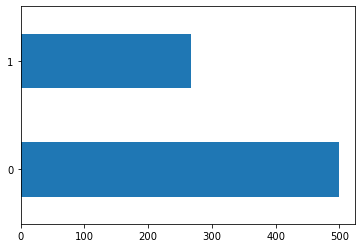

In [8]:
df["Outcome"].value_counts().plot.barh();

In [9]:
# veri seti içerisindeki sürekli değişkenlerin betimsel istatistiklerine bakalım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Outcome/hedef/bağımlı değişkenimizi ayırt edici özelliğe sahip değişkenler hangileri olabilir? arka tarafta makinenin çözmeye çalıştığı şeydir.

### lojistik regresyona uygun olacak şekilde değişkenlerimizi oluşturalım

In [10]:
y=df["Outcome"]

In [11]:
# Outcome'ı silelim, sadece bağımsız değişkenler olmalı
X=df.drop(["Outcome"], axis=1)

In [12]:
# statsmodels ile

In [13]:
import statsmodels.api as sm
# logit modeli kuralım
loj = sm.Logit(y,X)
loj_model=loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [14]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                 0.05922
Time:                        20:28:40   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

* Pseudo R-squ.:	0.05922 -> açıklanma oranını ifade eden R-square değeri
* LLR p-value:	2.583e-10 -> modelin anlamlılığını ifade eden değerler
* P>|z|: değişkenlerin anlamlılıklarını ifade eder.
* SkinThickness: (P>|z|)0.974, Insulin: (P>|z|)0.346, BMI: (P>|z|)0.653, DiabetesPedigreeFunction: (P>|z|)0.182 -> çok anlamlı değil ve katsayılara(coef) baktığımızda yansımış durumda
* logaritmik dönüşümün tersinin alınarak katsayıların bağımlı değişkene olan etkilerinin yorumlanması gerekir

In [15]:
# bilgilerin gözükmesi için
from sklearn import set_config
set_config(print_changed_only=False)

In [16]:
# scikit-learn

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
loj = LogisticRegression(solver="liblinear")

In [19]:
loj_model = loj.fit(X,y) # lojistik regresyon modelini oluşturdum
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# lojistik regresyon modeli içerisinden katsayılara erişelim
# sabit katsayı (const)
loj_model.intercept_

array([-5.85986161])

In [21]:
# bütün bağımsız değişkenlerin katsayı değerlerini alıyoruz
loj_model.coef_

array([[ 1.16912604e-01,  2.83133925e-02, -1.69330599e-02,
         7.86949021e-04, -6.33349234e-04,  5.94785140e-02,
         6.60167821e-01,  7.17936702e-03]])

# Lojistik Regresyon - Tahmin & Model Tuning

lojistik regresyonun diğer bazı ele aldığımız algoritmalar gibi dışsal bir parametresi, model hiperparametresi yok.

burada optimize edilebilecek bir parametre olarak değerlendirilebilecek olan tek parametresi aslında sabit

dolayısıyla burada tam anlamıyla bir model tuning işlemi yapılmayacak aslında bir model doğrulama işlemi yapılacak

sınıflandırma problemlerinde ele aldığımız bağımlı değişkenin ilgilendiğiniz sınıfın doğru sınıf olup olmadığı bir kontrol edip bundan emin olmanız gerekmektedir. genellikle sınıflandırma problemlerinde bu sık karşılaşılan bir problemdir.

örneğin bir şekilde verinin oluşma veya oluşturma veya bizim şeklimizden bizim tarafımızdan oluşturma şekliyle ilgilenilen sınıfın ne olduğunun karışması gibi bir durum söz konusu olur.

örneğin kredi ödeyip ödeyememe durumunda normalde, genelde nadir olan olaylara daha çok odaklanılır. onları açığa çıkarmak onların özelinde gitmeye çalışılır bu sebeple odak olay o konu olur.

mesela şeker hastalığına sahip olup olmamak durumunda şeker hastalığına sahip olmak durumuna, kanserli olup olmamak durumunda kanserli olmak durumuna, kredisini ödeyebilecek ödeyemeyecek durumunda kredisini ödeyemeyecek durumuna  odaklanılır ve bunlar genelde birinci sınıf olur. dolayısıyla sınıflandırma problemlerine başlamadan önce mutlaka bu sınıfı doğru atanıp atanmadığını doğru belirledik mi? binary dönüştürme işlemi doğru gerçekleşti mi? mutlaka ve mutlaka kontrol etmeliyiz çünkü çıkacak olan sonucu değerlendirirken buna göre bir yorumlama yapacağız ve baştan yanlış giderse tüm bölümler yanlış olur.

tahmin işlemi için artık öğrendik ki bu doğrusal bir form olduğundan dolayı katsayılar(loj_model.coef_) 

bir hasta geldiğinde bu hastanın bir bağımsız değişken değeri olacak yani gözlem birimi geldiğinde onun değişkenler bazındaki değerlerini her birisini kendisine ait olan katsayı (coef) ile çarpıp başına sabiti (intercept) eklediğimde bu durumla ilgili bir olasılık değerini verir.

öncekinde sonuç bir sürekli değerdi, lojistik regresyonda ise olasılık değeri.

Karmaşıklık matrisi oluşturma işlemi ve accuracy 

In [22]:
# bağımsız değişkenleri (X) tahmin et
y_pred = loj_model.predict(X)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
# karmaşıklık matrisi
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

* gerçekte 1 iken 1 denilenler: 448
* gerçekte 0 iken 1 denilenler: 52
* gerçekte 1 iken 0 denilenler: 121
* gerçekte 0 iken 0 denilenler: 148

In [25]:
accuracy_score(y,y_pred)

0.7747395833333334

In [26]:
# en detaylı bir sınıflandırma algoritmasının
# sonuçlarını değerlendirecek çıktılardan birisi
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



şöyle bir problemimiz olsun: lojistik regresyon çıktısı bize 

In [27]:
# lojistik regresyon çıktısı:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

1 ve 0 değerlerini verdi kurduğumuz modeli kullanarak bir tahmin yapma işlemi gerçekleştirdiğimizde bunun sonucunda bu tahmin fonksiyonu bize 1 ve 0 değerlerini döndermiş oldu

ya ben birinci sınıfın gerçekleşme olasılığını görmek istiyorsam sadece ben olasılık değerlerini istiyorum bana 1, 0 olarak dönme neden bana sadece 1 ve 0  verdin? ben kendim belirli bir eşik değeri vereceğim buna göre 1 ya da 0 sınıfına dahil edeceğim

Doğrulama yapalım:

In [28]:
# X'i kullanarak model kur ama bana bu modele ilişkin
# olasılık değerlerini gönder
loj_model.predict_proba(X)[0:10]
# 0. sütunu olasılığı 0 olan değerleri verir

array([[0.35166451, 0.64833549],
       [0.91641945, 0.08358055],
       [0.2257798 , 0.7742202 ],
       [0.92054046, 0.07945954],
       [0.17167558, 0.82832442],
       [0.79790744, 0.20209256],
       [0.87907136, 0.12092864],
       [0.27656592, 0.72343408],
       [0.31934154, 0.68065846],
       [0.92202008, 0.07797992]])

In [29]:
# ilk 10 satır, 0. sütun
# olasılığı 0 olan değerler
loj_model.predict_proba(X)[0:10][:,0:1]

array([[0.35166451],
       [0.91641945],
       [0.2257798 ],
       [0.92054046],
       [0.17167558],
       [0.79790744],
       [0.87907136],
       [0.27656592],
       [0.31934154],
       [0.92202008]])

In [30]:
# tahmin edilen y değerleri
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [31]:
# gerçek y değerleri
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

1. değer için gerçekte 1 ve tahmin edilen değer 1 : olasılık değerlerine baktığımızda
*      0            1
* [0.35166451, 0.64833549]


2. değer için gerçekte 0 ve tahmin edilen değer 0 : olasılık değerlerine baktığımızda
*       0           1
* [0.91641945, 0.08358055]
* 1. sınıfa ait olma olasılığı 0 diyebiliriz.

predict_proba fonksiyonu ikili bir çıktı üretir. bu ikili çıktının 0. indeksinde yer alan 0 sınıfına ait olasılıktır. öyleki 0.35 sonucunun nedeni 1. sınıfın olmasından kaynaklı  

1'e ait olasılıklar sağ taraftır yani çalışmamız kapsamında ilgilendiğimiz olasılıklar sağ taraftaki olasılıklar olacaktır.

predict_proba çıktısının 0. indeksinde 0. sınıfa ait olma olasılıkları, 1. indeksinde 1. sınıfa ait olma olasılıkları yer alır.

tahmin edilen y değerlerini buradaki olasılık değerleri için bir eşik değeri oluşturup buna göre 1 ve 0 olarak işaretlemek istediğimizi düşünelim.

In [32]:
# X'i kullanarak model kur ama bana bu modele ilişkin
# olasılık değerlerini gönder
loj_model.predict_proba(X)[0:10]
# 0. sütunu olasılığı 0 olan değerleri verir

array([[0.35166451, 0.64833549],
       [0.91641945, 0.08358055],
       [0.2257798 , 0.7742202 ],
       [0.92054046, 0.07945954],
       [0.17167558, 0.82832442],
       [0.79790744, 0.20209256],
       [0.87907136, 0.12092864],
       [0.27656592, 0.72343408],
       [0.31934154, 0.68065846],
       [0.92202008, 0.07797992]])

In [33]:
# 1. sütunda 0.5'den fazla ise olasılık değeri, sınıfı 1 olsun.
# düşük ise sınıfı 0 olsun.

In [34]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[:10]

array([0.64833549, 0.08358055, 0.7742202 , 0.07945954, 0.82832442,
       0.20209256, 0.12092864, 0.72343408, 0.68065846, 0.07797992])

In [35]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [36]:
# y'nin tahmin edilen değerleri benim belirlediğim eşik değere göre oluşturuldu
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [37]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

In [38]:
# doğruluk skoru
accuracy_score(y, y_pred)
# bütün veri seti üzerinden hesaplandı

0.7747395833333334

Genelde doğruluk skoruna (accuracy_score) bakacağız. doğru yaptığımız işler bölü tüm işler

In [39]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# ROC eğrisi

* sağ altında kalan alanın büyük olması başarılı olduğunu gösterir
* ortadaki çizgi hiçbir sınıflandırma problemi yapmasak tüm değerlere rastgele 1 ve 0 değerlerini atasak zaten olacak olan çizgiydi ve ondan uzakta olmalıyız

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
# roc_auc_score: roc'u hesaplayacak
# y: y(bağımlı) gerçek değerleri
# loj_model.predict(X) : tahmini y değerleri
logit_roc_auc = roc_auc_score(y,loj_model.predict(X))

In [42]:
# loj_model.predict_proba(x)[:,1] : 1 sınıfı mı olasılık değerleri
# fpr: false pozitif rate
fpr,tpr,thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])

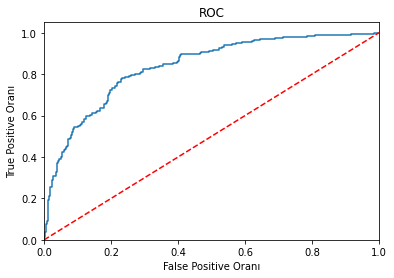

In [43]:
plt.figure()
# eğriyi oluşturdum
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

modelin başarısını hesaplamak için kullanacak olduğumuz eğri, değerlendirmek için kullanacak olduğumuz eğri mavidir.

sağ alt alanın değeri 0 ile 1 arasındadır. bu bize modelimizin başarısını söyler. 1'e yaklaştıkça modelin başarısı yükselir.

# Model Doğrulama

modeli test-train ayırma işlemine tabii tutacağız ondan sonra bir Cross Validation yöntemiyle bir hata elde edeceğiz 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=42)

In [45]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# 1. argümanına gerçek değerleri, 2. argümanına tahmin değerleri
# test hatası
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

test-train ayrımıyla sınama seti yaklaşımını kullandık

cross validation skoruna bakalım yani doğrulanmış skor

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV 

In [48]:
# en doğru sonuç
# cv hatası
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536